#### FROM JAN_MODELS DATASET: MODEL - 5
https://github.com/gempy-project/gempy/tree/main/examples/data/input_data/jan_models

### Stratigraphy Rock1, Rock2 GemPy model

In [39]:
import gempy as gp
import gempy_viewer as gpv
import numpy as np

In [44]:
geo_model1 = gp.create_geomodel(
    project_name = 'strata_model',
    extent = [-100, 1100, 100, 900, 100, 900],
    resolution = [100, 50, 50],
    importer_helper = gp.data.ImporterHelper(
        path_to_orientations = "model5_orientations_nofault.csv",
        path_to_surface_points = "model5_surface_points_nofault.csv"
    )
)

C:\Users\LENOVO\gempy_env\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


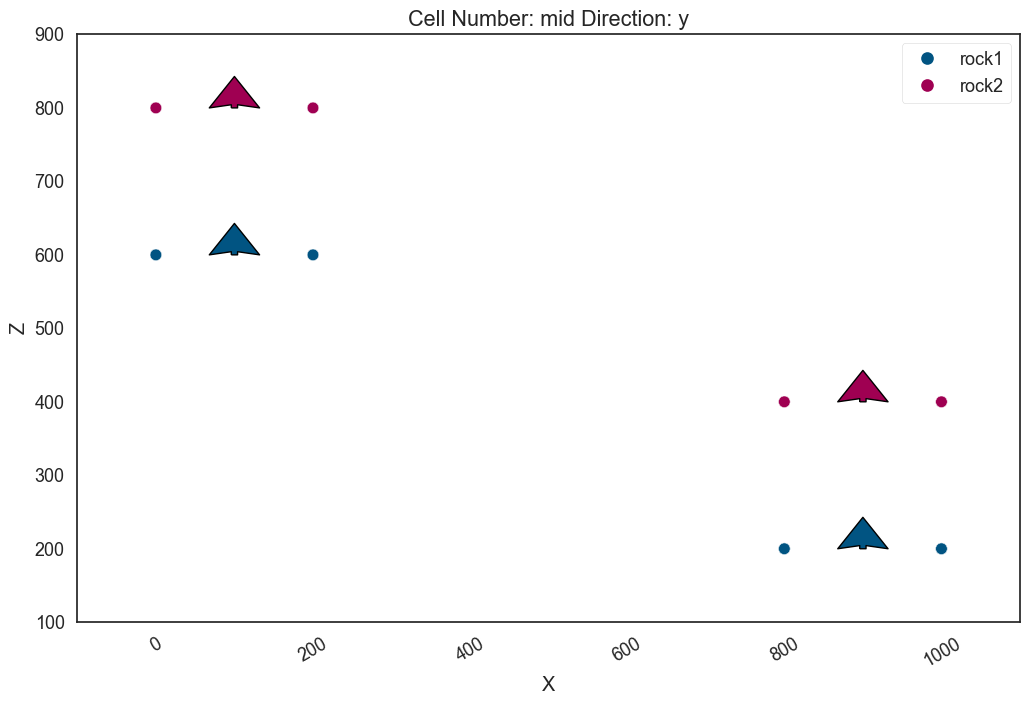

In [45]:
gpv.plot_2d(geo_model1)

In [46]:
#Compute a solution for the model
gp.compute_model(geo_model1)

Setting Backend To: AvailableBackends.numpy
Chunking done: 17 chunks


C:\Users\LENOVO\gempy_env\Lib\site-packages\gempy_engine\modules\activator\_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Solutions(4 Octree Levels, 2 DualContouringMeshes)

C:\Users\LENOVO\gempy_env\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


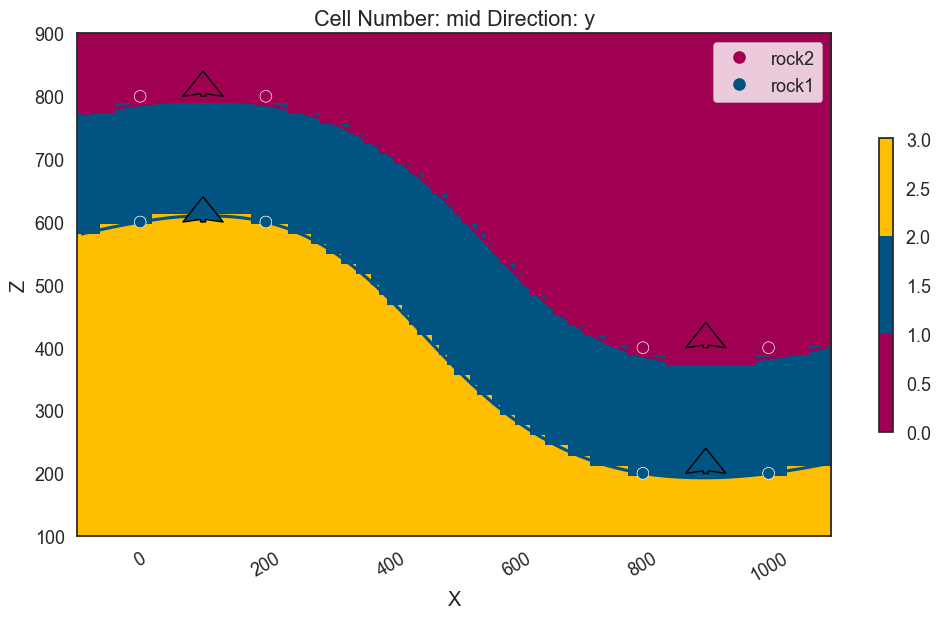

In [47]:
# 2D Visualization (Cross-section)
gpv.plot_2d(geo_model1, cell_number = 'mid',  show_data = True)

In [49]:
# 3D Visualization
gpv.plot_3d(geo_model1)

##### Same result with 4D Gempy (without universal/basis term)

##### Same result with 4D Gempy (with universal/basis term)

### Faulted model Rock1, Rock2 and Fault GemPy model

In [50]:
geo_model2 = gp.create_geomodel(
    project_name = 'fault_model',
    extent = [-100, 1100, 100, 900, 100, 900],
    resolution = [100, 50, 50],
    importer_helper = gp.data.ImporterHelper(
        path_to_orientations = "model5_orientations.csv",
        path_to_surface_points = "model5_surface_points.csv"
    )
)

C:\Users\LENOVO\gempy_env\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


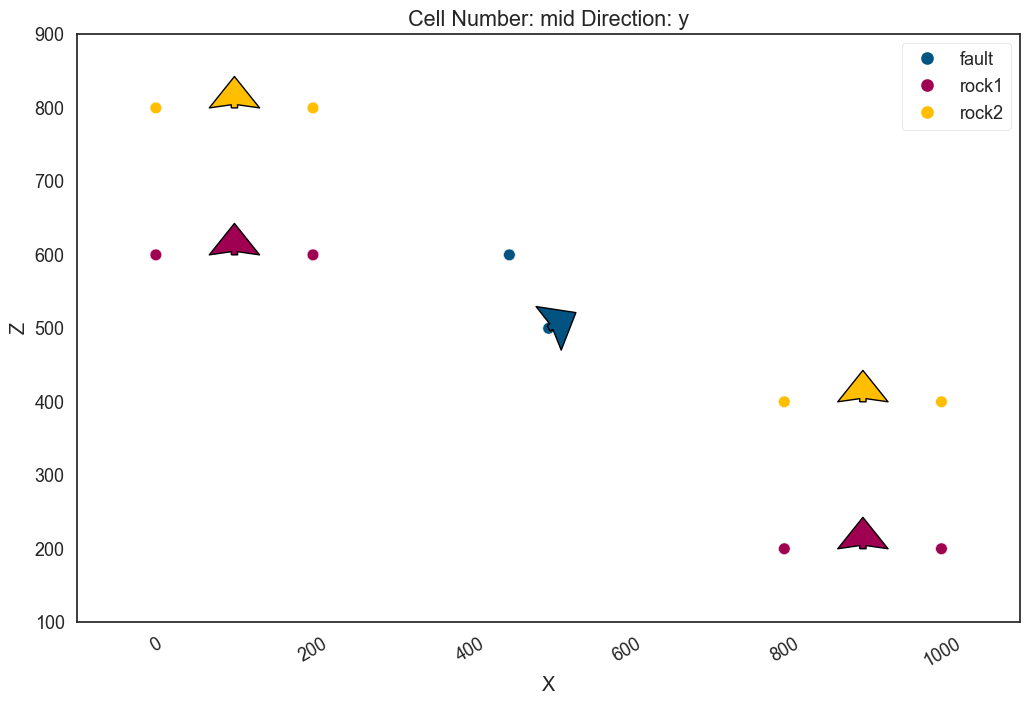

In [51]:
gpv.plot_2d(geo_model2)

In [52]:
geo_model2.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=fault,
	color=#015482,
	is_active=True
),
Element(
	name=rock1,
	color=#9f0052,
	is_active=True
),
Element(
	name=rock2,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [53]:
gp.map_stack_to_surfaces(
    gempy_model = geo_model2,
    mapping_object = {
            "Fault": "fault",
            "Strata_Series": ("rock1", "rock2")
    }
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=fault,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strata_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock1,
	color=#9f0052,
	is_active=True
),
Element(
	name=rock2,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False],
 [False, False]],

In [54]:
gp.set_is_fault(geo_model2, ["Fault"])

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=fault,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strata_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock1,
	color=#9f0052,
	is_active=True
),
Element(
	name=rock2,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True],
 [False, False]],

In [55]:
gp.compute_model(geo_model2)

Setting Backend To: AvailableBackends.numpy
Chunking done: 6 chunks


C:\Users\LENOVO\gempy_env\Lib\site-packages\gempy_engine\modules\activator\_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Chunking done: 18 chunks


C:\Users\LENOVO\gempy_env\Lib\site-packages\gempy_engine\modules\activator\_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Solutions(4 Octree Levels, 3 DualContouringMeshes)

C:\Users\LENOVO\gempy_env\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


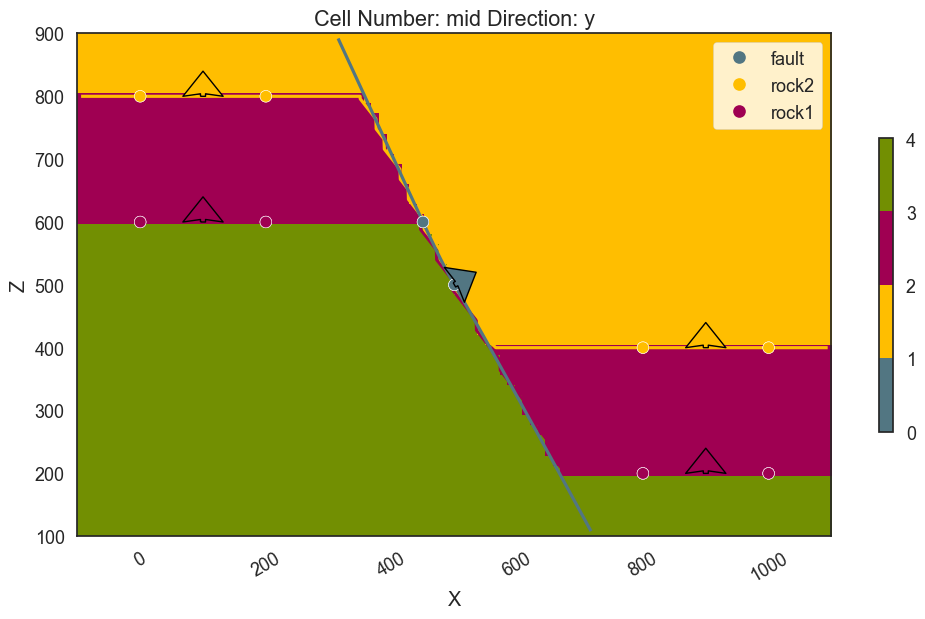

In [56]:
gpv.plot_2d(geo_model2)

In [ ]:
gpv.plot_3d(geo_model2)

C:\Users\LENOVO\gempy_env\Lib\site-packages\gempy_viewer\modules\plot_3d\drawer_surfaces_3d.py:38: PyVistaDeprecationWarning: 
gempy_env/Lib/site-packages/gempy_viewer/modules/plot_3d/drawer_surfaces_3d.py:38: Argument 'color' must be passed as a keyword argument to function 'BasePlotter.add_mesh'.
From version 0.50, passing this as a positional argument will result in a TypeError.
  gempy_vista.surface_actors[element.name] = gempy_vista.p.add_mesh(
